In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

ModuleNotFoundError: No module named 'tensorflow.python'

In [6]:
df = pd.read_csv('../data/processed/mbajk_dataset_processed.csv')

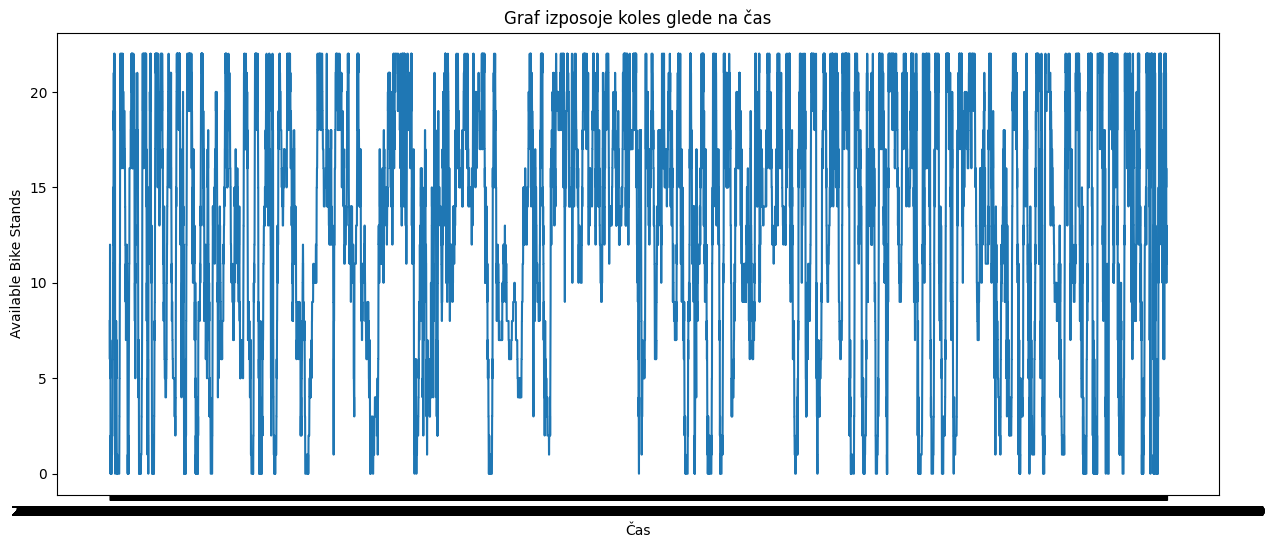

In [7]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['available_bike_stands'])
plt.title('Graf izposoje koles glede na čas')
plt.xlabel('Čas')
plt.ylabel('Available Bike Stands')
plt.show()

In [15]:
# filtriramo po available_bike_stands
df_uni = df['available_bike_stands']
uni_array = df_uni.values.reshape(-1, 1)

# razdelitev na učno in testno množico
train_size = len(df_uni) - 1488
train, test = uni_array[0:train_size], uni_array[train_size:]

print('df len', len(df_uni))
print('train len', len(train))
print('test len', len(test))

scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

df len 18692
train len 17204
test len 1488


In [16]:
def create_dataset(dataset, window_size=186):
  X, y = [], []
  for i in range(len(dataset) - window_size):
      window = dataset[i:i+window_size, 0]
      target = dataset[i+window_size, 0]
      X.append(window)
      y.append(target)
  return np.array(X), np.array(y)

In [17]:
window_size = 186

X_train, y_train = create_dataset(train_scaled, window_size=window_size)
X_test, y_test = create_dataset(test_scaled, window_size=window_size)

print('Oblika učnih podatkov: X_train: ', X_train.shape, ', y_train:', y_train.shape)
print('Oblika testnih podatkov: X_test: ', X_test.shape, ', y_test:', y_test.shape)

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print('Preoblikovani X_train:', X_train.shape)
print('Preoblikovani X_test:', X_test.shape)

Oblika učnih podatkov: X_train:  (17018, 186) , y_train: (17018,)
Oblika testnih podatkov: X_test:  (1302, 186) , y_test: (1302,)
Preoblikovani X_train: (17018, 1, 186)
Preoblikovani X_test: (1302, 1, 186)


In [18]:
def build_gru_model(input_shape):
  model = Sequential()
  model.add(GRU(32, activation='relu', input_shape=input_shape, return_sequences=True))
  model.add(GRU(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mse')
  return model

In [33]:
input_shape = (X_train.shape[1], X_train.shape[2])

gru_model = build_gru_model(input_shape)

gru_history = gru_model.fit(X_train, y_train, epochs=15, validation_split=0.2)

NameError: name 'Sequential' is not defined